In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

45.71525942322333 -87.66184856310313
-41.565597909670494 15.09942114330218
-70.37563690282327 -40.92201619194984
-0.6070159540594489 -107.67375774971309
-27.936595195707362 92.42759186951162
20.666486190955865 96.18295713454478
-41.08852929372334 136.2371008634073
-77.79115458410827 -38.89338589984615
-29.10666474731223 -127.8818239608139
-12.071780240151668 26.990145189752894
-11.110411460247931 47.101428485161165
-14.527174593044862 39.54517874541921
18.905738397428152 -30.509886947581975
-78.27118569345942 113.3995581682102
57.660960669275 -25.54291291580293
-4.782224117100284 -100.91790750717179
21.70752309912436 -151.46410577087616
-5.552971355387143 132.68841232132985
-44.55479488258393 -146.16634317773472
12.681694229522108 44.122196371026774
10.952255315613044 -49.643565955623444
56.6821101002775 113.98081582558382
-84.06527228674416 -12.464787010183755
59.66450601467713 65.24848829474362
-85.58004186419748 87.72568052258339
74.28749510017951 -64.95167708629472
0.54380046339331

-14.484688187798696 -154.99730661864905
-0.20444904020565957 63.277394659459134
2.6999125010271 5.514780732403068
15.79561315053624 -163.24319696491483
-86.0317585427305 59.65856449742836
87.46609433429347 123.93331297145522
51.56074356372571 -131.47274759885778
67.1833127404374 -59.789673240061816
-1.040806799251044 -126.74307772994774
-34.36343267568406 -118.2840863754689
-15.18676049518703 -147.67438287533426
88.54560256900325 167.5936369453167
3.069264732837553 -78.65698803764377
4.479853309238038 -46.567800389984455
21.563477837137953 29.862068459636703
21.10781551924282 -87.05650928975827
-8.86417078056651 -97.8633998204545
32.45037825534324 98.09664783961688
-51.7812254702695 122.83642746860204
-80.03651304723695 98.27554185401692
-79.08807163356838 32.77396600952457
-65.26275117609715 169.15980092144304
53.486568861984125 -105.24046221115358
-21.511907527696522 46.19431042122696
-30.670975641822615 78.30231309195068
-53.573006045402686 -163.16722719170977
67.71429780910034 -88.

1.0911422748384183 20.289202487495515
50.03325761222558 166.8391726761356
76.0627563244912 86.70381230626958
63.379197298450094 47.36358387427072
-42.76699958815366 -113.01268941075097
-23.66985228021609 -119.72106394947306
-82.44443823886917 -148.47666546624458
-70.98821956253336 164.42997397391832
18.846127441633868 -27.970923068476367
-17.429114152866987 -13.59006157294101
-12.450711365755609 7.3395507578685795
-29.566514292769618 157.47865312838144
-52.414638061747084 80.82223125647397
34.182978582932606 -0.026653091685659547
83.71529282726999 -1.9814715497673774
-79.92886461369405 -19.496481431828215
-4.755038442611365 68.42414625345927
17.51879604510671 177.67553525607957
-83.36950843252252 164.3805132684319
-10.304786741512018 -152.59228038565203
-0.39805158435240173 -163.93260697794236
6.207949344671391 -81.2566744520534
-48.805052658440474 -81.13420815669411
27.287778013391616 -128.20513842871793
37.89116961793199 42.15596641926433
15.856480266887104 -151.8346898447248
46.8423

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_keys

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_keys


In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | escanaba
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | yamethin
Processing Record 7 of Set 1 | mount gambier
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | kipushi
Processing Record 10 of Set 1 | dzaoudzi
Processing Record 11 of Set 1 | nampula
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | grindavik
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | tual
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | lahij
Processing Record 19 of Set 1 | sinnamary
Processing Record 20 of Set 1 | severomuysk
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | lugovoy
Processing Record 23 of Set 1 | busselton
Proc

Processing Record 41 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 42 of Set 4 | port hawkesbury
Processing Record 43 of Set 4 | hobyo
Processing Record 44 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 45 of Set 4 | nome
Processing Record 46 of Set 4 | fort nelson
Processing Record 47 of Set 4 | rawson
Processing Record 48 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 49 of Set 4 | padang
Processing Record 50 of Set 4 | ilulissat
Processing Record 1 of Set 5 | coquimbo
Processing Record 2 of Set 5 | hervey bay
Processing Record 3 of Set 5 | sao joao da barra
Processing Record 4 of Set 5 | envigado
Processing Record 5 of Set 5 | aketi
Processing Record 6 of Set 5 | burica
City not found. Skipping...
Processing Record 7 of Set 5 | lata
Processing Record 8 of Set 5 | saskylakh
Processing Record 9 of Set 5 | doctor pedro p. pena
City not found. Skipping...
Processing Record 10 of Set 5 | antananarivo
Processing Record 11 of 

Processing Record 27 of Set 8 | mindelo
Processing Record 28 of Set 8 | saldanha
Processing Record 29 of Set 8 | beloha
Processing Record 30 of Set 8 | wukari
Processing Record 31 of Set 8 | saleaula
City not found. Skipping...
Processing Record 32 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 33 of Set 8 | china
Processing Record 34 of Set 8 | pauini
Processing Record 35 of Set 8 | yenagoa
Processing Record 36 of Set 8 | east london
Processing Record 37 of Set 8 | tiarei
Processing Record 38 of Set 8 | mosquera
Processing Record 39 of Set 8 | amapa
Processing Record 40 of Set 8 | leona vicario
Processing Record 41 of Set 8 | tezu
Processing Record 42 of Set 8 | prince albert
Processing Record 43 of Set 8 | ikalamavony
Processing Record 44 of Set 8 | ust-kalmanka
Processing Record 45 of Set 8 | waingapu
Processing Record 46 of Set 8 | vanimo
Processing Record 47 of Set 8 | voznesenye
Processing Record 48 of Set 8 | maceio
Processing Record 49 of Set 8 | prado
Proces

Processing Record 16 of Set 12 | santa marta
Processing Record 17 of Set 12 | mahesana
Processing Record 18 of Set 12 | batsfjord
Processing Record 19 of Set 12 | geraldton
Processing Record 20 of Set 12 | anadyr
Processing Record 21 of Set 12 | contai
Processing Record 22 of Set 12 | george
Processing Record 23 of Set 12 | saurimo
Processing Record 24 of Set 12 | chingirlau
Processing Record 25 of Set 12 | banjarmasin
Processing Record 26 of Set 12 | shimoda
Processing Record 27 of Set 12 | pamplona
Processing Record 28 of Set 12 | bull savanna
Processing Record 29 of Set 12 | chicama
Processing Record 30 of Set 12 | cuiluan
Processing Record 31 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 32 of Set 12 | bartica
Processing Record 33 of Set 12 | nha trang
Processing Record 34 of Set 12 | port lincoln
Processing Record 35 of Set 12 | kavkazskiy
Processing Record 36 of Set 12 | vychegodskiy
Processing Record 37 of Set 12 | roald
Processing Record 38 of Set 12 | sal

In [16]:
len(city_data)

548


In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Escanaba,45.7453,-87.0646,84.51,53,20,10.36,US,2022-05-14 19:48:01
1,Hermanus,-34.4187,19.2345,57.96,77,16,6.62,ZA,2022-05-14 19:48:01
2,Ushuaia,-54.8000,-68.3000,46.06,71,20,5.75,AR,2022-05-14 19:48:02
3,Puerto Ayora,-0.7393,-90.3518,76.96,93,78,3.00,EC,2022-05-14 19:48:02
4,Carnarvon,-24.8667,113.6333,63.75,51,0,17.00,AU,2022-05-14 19:48:03
5,Yamethin,20.4333,96.1500,79.16,79,0,8.08,MM,2022-05-14 19:48:04
6,Mount Gambier,-37.8333,140.7667,55.18,91,57,8.86,AU,2022-05-14 19:48:04
7,Rikitea,-23.1203,-134.9692,76.12,69,0,22.08,PF,2022-05-14 19:47:30
8,Kipushi,-11.7667,27.2333,57.78,72,0,2.86,CD,2022-05-14 19:48:05
9,Dzaoudzi,-12.7887,45.2699,80.49,83,100,6.91,YT,2022-05-14 19:48:06


In [19]:
#reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Escanaba,US,2022-05-14 19:48:01,45.7453,-87.0646,84.51,53,20,10.36
1,Hermanus,ZA,2022-05-14 19:48:01,-34.4187,19.2345,57.96,77,16,6.62
2,Ushuaia,AR,2022-05-14 19:48:02,-54.8000,-68.3000,46.06,71,20,5.75
3,Puerto Ayora,EC,2022-05-14 19:48:02,-0.7393,-90.3518,76.96,93,78,3.00
4,Carnarvon,AU,2022-05-14 19:48:03,-24.8667,113.6333,63.75,51,0,17.00
5,Yamethin,MM,2022-05-14 19:48:04,20.4333,96.1500,79.16,79,0,8.08
6,Mount Gambier,AU,2022-05-14 19:48:04,-37.8333,140.7667,55.18,91,57,8.86
7,Rikitea,PF,2022-05-14 19:47:30,-23.1203,-134.9692,76.12,69,0,22.08
8,Kipushi,CD,2022-05-14 19:48:05,-11.7667,27.2333,57.78,72,0,2.86
9,Dzaoudzi,YT,2022-05-14 19:48:06,-12.7887,45.2699,80.49,83,100,6.91


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

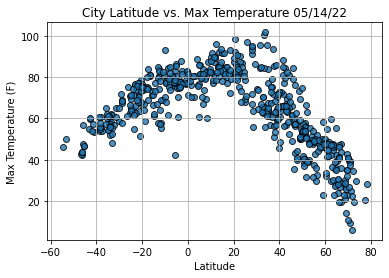

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

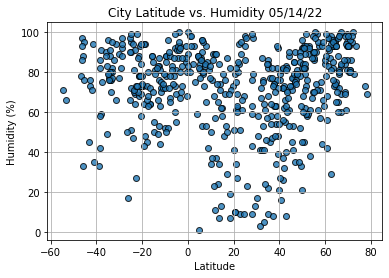

In [25]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

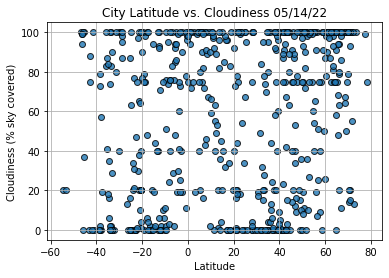

In [26]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (% sky covered)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

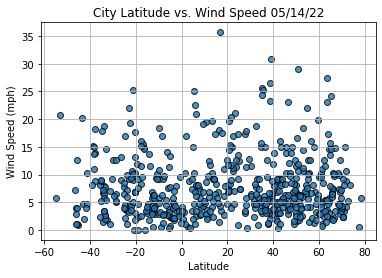

In [27]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()